# Stock Market Analysis using Python, pandas, NumPy

The aim of the project was to extract information about various technology stocks mainly - Google, Apple, Microsoft and Amazon from the online stock trading sites - Yahoo Finance and to visualize different aspects of the stocks like the Adjusted Closing Prices, Volumes of stocks traded on a particular day, moving averages of the closing price-to get a basic idea of which way the price is moving by cutting down noise from the data and the daily returns on the stocks. Correlation plots were created for the daily percentage return and Closing prices of the stocks to check how correlated two stocks are. It was obvious that all technology stocks are positively correlated but few like Amazon and Microsoft were highly correlated with each other. The information gathered on daily percentage returns was further used for Risk Analysis by calculating the Expected Return (Average / mean return of the stock) and standard deviation (measurement of Risk -> Greater the std. dev. greater is the risk and vice versa). A scatter plot was created for comparing the Expected return of stocks to its risk. This helped in visualizing the risk factor of various stocks (stocks with high standard deviation and low return).



In [3]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr

# For time stamps
from datetime import datetime

# For division in Python 3
from __future__ import division

In [10]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the list of tech stocks
tech_list = ['AAPL', 'GOOGL', 'MSFT','AMZN']

# Set the start and end dates
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 1 year ago

# Fetch data for each stock
for stock in tech_list:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    globals()[stock] = stock_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [38]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800,NaN,NaN,NaN,NaN
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400,NaN,NaN,NaN,-0.030685
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700,NaN,NaN,NaN,0.028324
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200,NaN,NaN,NaN,0.002469
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500,NaN,NaN,NaN,-0.037405


In [11]:
# Summary Stats for Apple stocks
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,171.229921,172.843200,169.945600,171.522200,171.082846,5.983102e+07
std,18.126223,17.894656,18.155745,17.977854,18.146827,1.769784e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,159.512497,161.670002,158.239998,160.137505,159.490532,4.836390e+07
50%,174.610001,176.345001,173.509995,175.029999,174.686760,5.576215e+07
75%,185.542503,187.297504,184.255005,185.824997,185.336056,6.635968e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [12]:
# General Info about Apple Stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-12-27 to 2023-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [14]:
# General Info about Apple Stock
AAPL.shape

(250, 6)

In [16]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

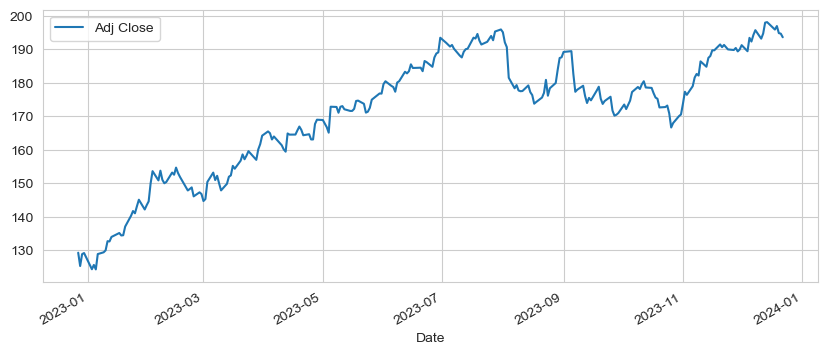

In [17]:
# Historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

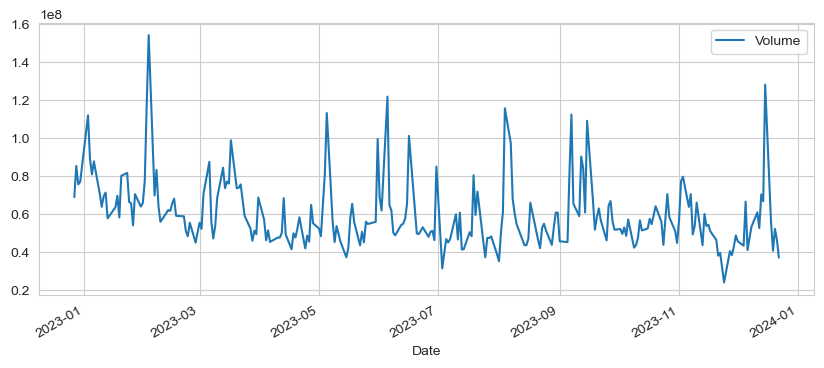

In [18]:
# Historical view of the total volume of Apple stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [22]:
#calculation of moving averages for 10,20,50 days of apple stocks
ma_day=[10,20,50]

for ma in ma_day:
    column_name=f"MA for {ma} days"
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()
    

In [ ]:
for ma in ma_days:
    column_name = f"MA for {ma} days"
    apple_data[column_name] = apple_data['Adj Close'].rolling(window=ma).mean()


<Axes: xlabel='Date'>

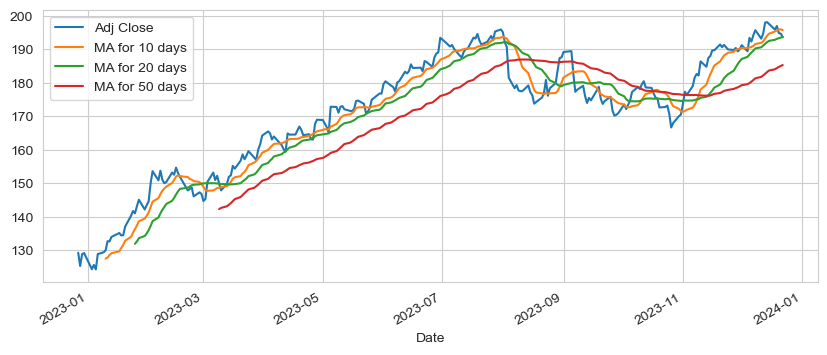

In [23]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [24]:
#Calculation to find he percent change for each day of Apple stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<Axes: xlabel='Date'>

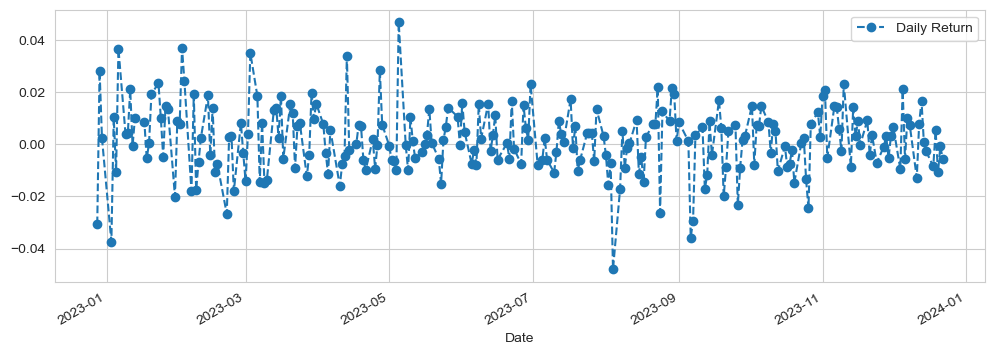

In [25]:
# Visualization of the percent change for each day of Apple stock
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\Users\balud\AppData\Local\Temp\ipykernel_12688\2746759757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

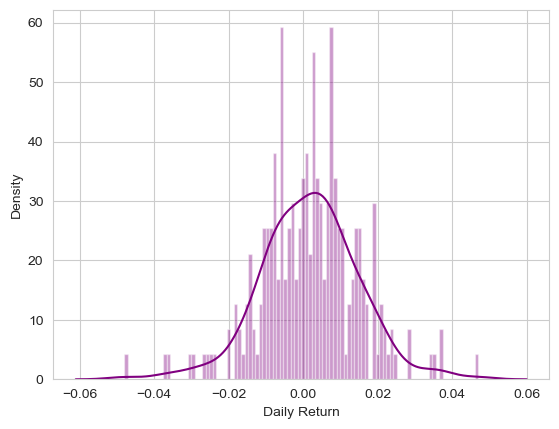

In [26]:
# Histogram to visualiza the average daily return of Apple stock
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


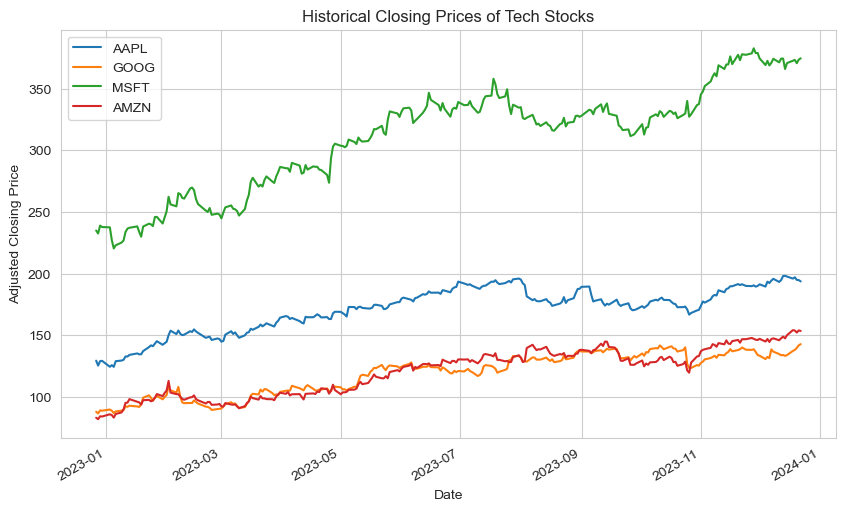

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the list of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # Three years ago

# Initialize an empty DataFrame to store closing prices
closing_df = pd.DataFrame()

# Fetch closing prices for each stock and concatenate them
for stock in tech_list:
    stock_data = yf.download(stock, start=start_date, end=end_date)['Adj Close']
    closing_df[stock] = stock_data

# Plot the closing prices
closing_df.plot(figsize=(10, 6))
plt.title('Historical Closing Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


In [41]:


# Fetch closing prices for each stock and concatenate them
for stock in tech_list:
    stock_data = yf.download(stock, start=start_date, end=end_date)['Adj Close']
    closing_df[stock] = stock_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [42]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-12-27,129.307236,87.930000,234.877365,83.040001
2022-12-28,125.339417,86.459999,232.468719,81.820000
2022-12-29,128.889557,88.949997,238.891754,84.180000
2022-12-30,129.207794,88.730003,237.712234,84.000000
2023-01-03,124.374802,89.699997,237.474335,85.820000


In [43]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_returns = closing_df.pct_change()

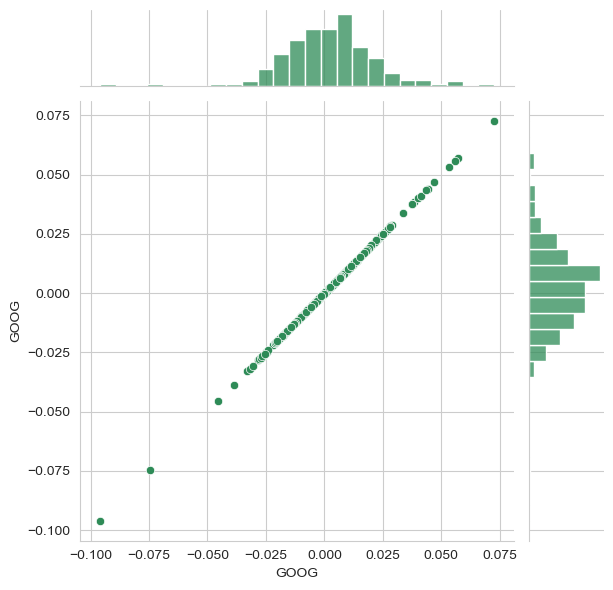

In [45]:
# Assuming tech_returns is your DataFrame containing stock returns
sns.jointplot(x='GOOG', y='GOOG', data=tech_returns, kind='scatter', color='seagreen')


So now we know that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare stocks with each other

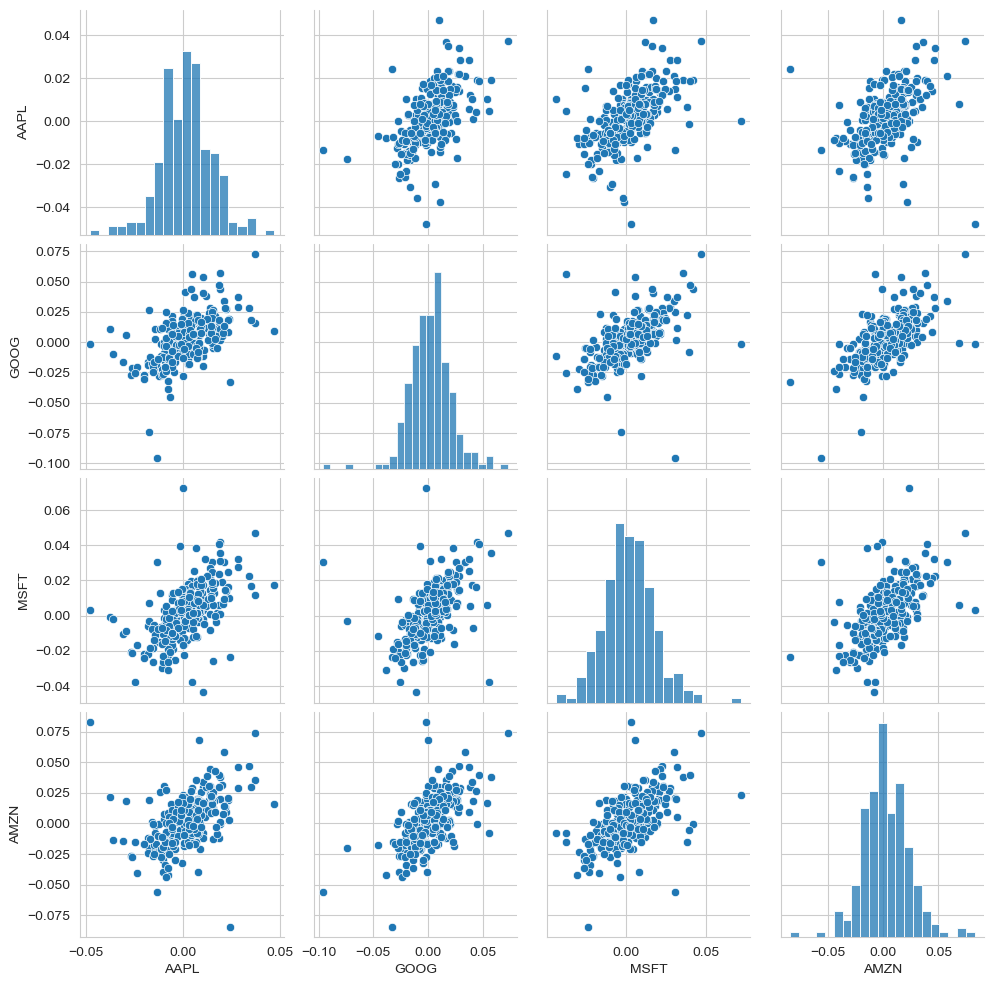

In [47]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_returns.dropna())

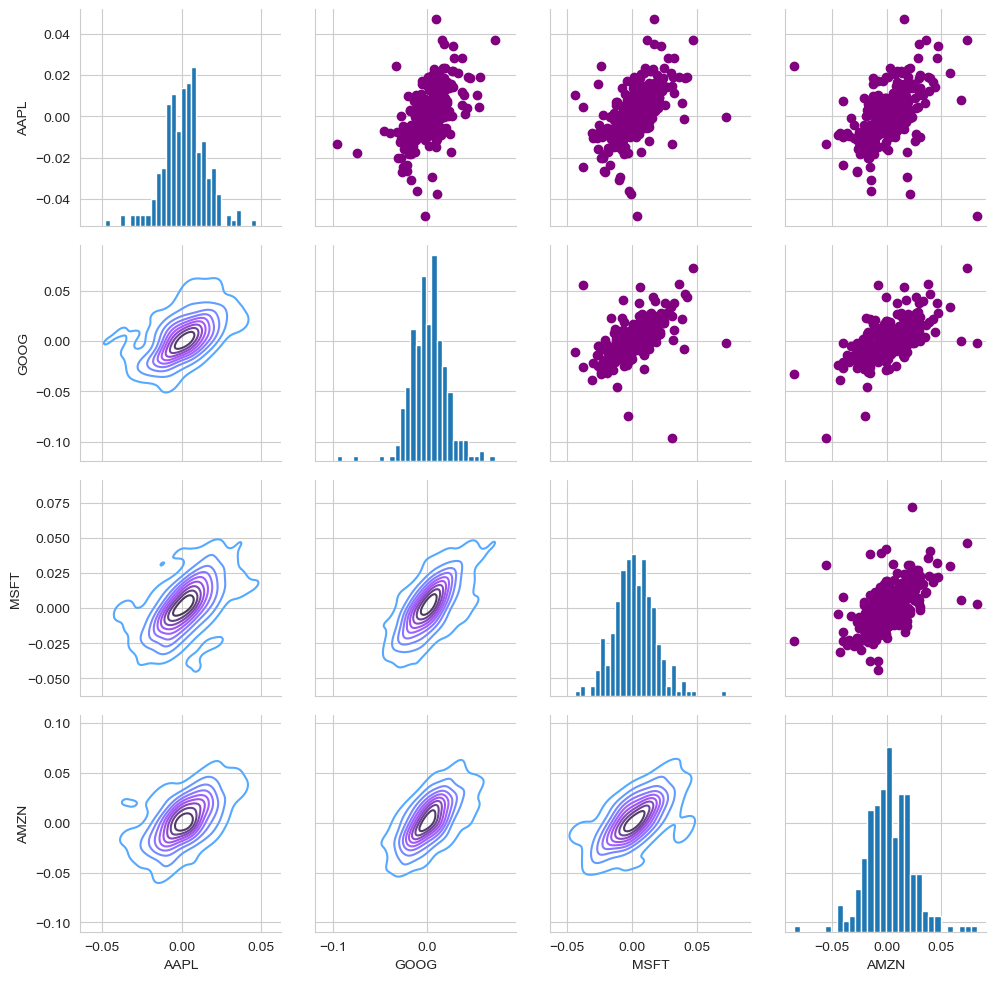

In [49]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

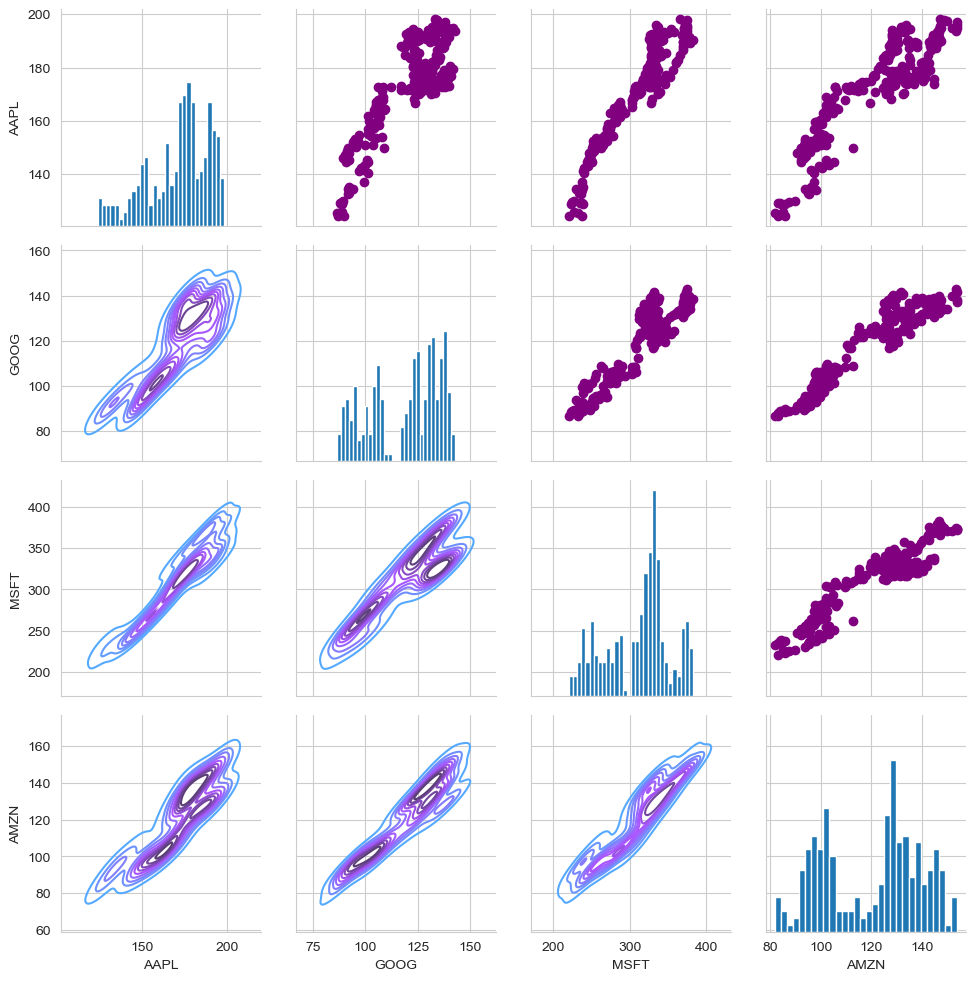

In [50]:

# Correlation analysis by using mixed types of plots for the closing price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

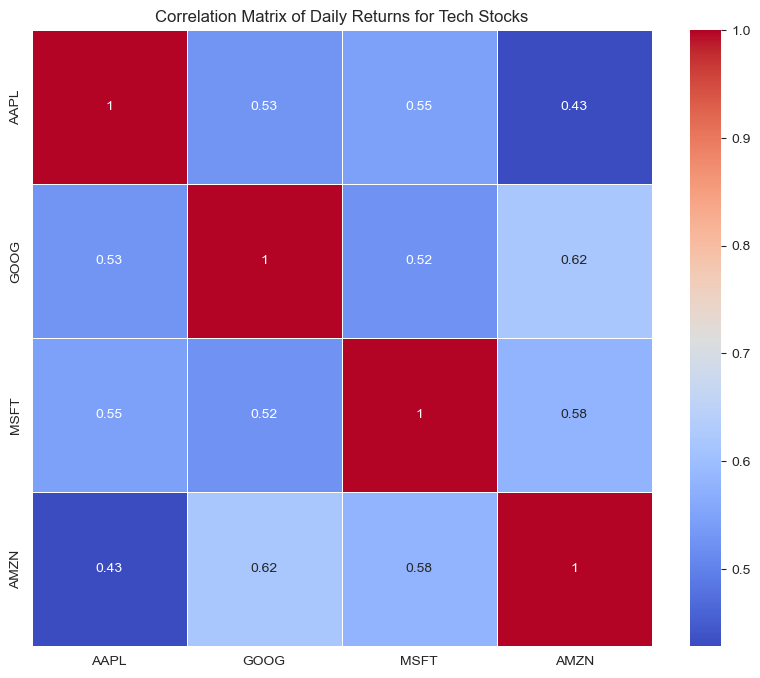

In [55]:

correlation_matrix = tech_returns.corr()
#Correlation matrix using headmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Daily Returns for Tech Stocks')
plt.show()

- There are many ways we can quantify risk, one of the ways is by comparing the expected return with the standard deviation of the daily returns.<br>
- Amazon and google stocks are highly correlated.

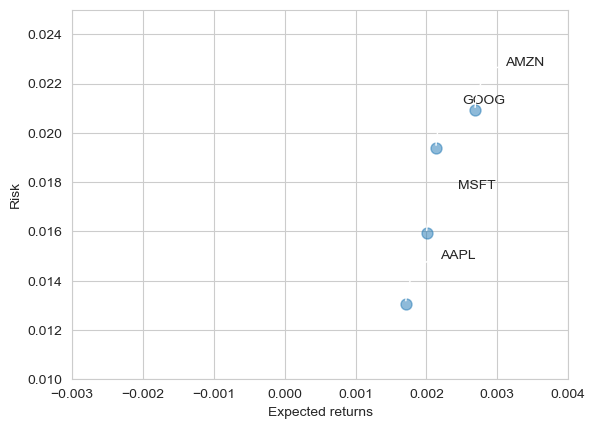

In [56]:
# Cleaning data frame by droping rows having null values
returns = tech_returns.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(returns.mean(), returns.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

<b>Conclusions:<br></b>
It can be visulaized from the above plot that Amazon stock have higher risk but offers higher returns than other stocks whereas Apple stock have lower risk but offers less return on its stock.